In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.metrics import mutual_info_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
[t1, t2, t3, t4] = [pd.read_csv(f'../data/train_{i}.csv', parse_dates=["时间"]) for i in range(1, 5)]

In [4]:
[p1, p2, p3, p4] = [pd.read_csv(f'../data/test_{i}.csv', parse_dates=["时间"]) for i in range(1, 5)]

In [5]:
for i, data in enumerate([t1, t2, t3, t4]):
    print(f'train data {i+1}, shape {data.shape} from {data["时间"].min().date()} to {data["时间"].max().date()}. \
          NaN data: {data.isnull().sum().sum()}')

train data 1, shape (66859, 9) from 2016-04-01 to 2018-04-30.           NaN data: 0
train data 2, shape (43755, 9) from 2017-01-01 to 2018-04-30.           NaN data: 0
train data 3, shape (29792, 9) from 2017-08-01 to 2018-07-31.           NaN data: 0
train data 4, shape (42687, 9) from 2017-01-01 to 2018-04-29.           NaN data: 0


In [6]:
for i, data in enumerate([p1, p2, p3, p4]):
    print(f'test data {i+1}, shape {data.shape} from {data["时间"].min().date()} to {data["时间"].max().date()}. \
          NaN data: {data.isnull().sum().sum()}')

test data 1, shape (11808, 8) from 2018-04-30 to 2018-08-31.           NaN data: 0
test data 2, shape (14688, 8) from 2018-04-30 to 2018-09-30.           NaN data: 0
test data 3, shape (6181, 8) from 2018-07-31 to 2018-10-08.           NaN data: 0
test data 4, shape (13894, 8) from 2018-05-01 to 2018-09-28.           NaN data: 0


In [11]:
p1.head()

,id,时间,辐照度,风速,风向,温度,压强,湿度
0,1,2018-04-30 23:59:59.985,-1.0,-0.801887,8,-0.046465,0.272727,0.221053
1,2,2018-05-01 00:14:59.985,-1.0,-0.783019,2,-0.058586,0.272727,0.221053
2,3,2018-05-01 00:29:59.985,-1.0,-0.783019,358,-0.066667,0.272727,0.221053
3,4,2018-05-01 00:44:59.985,-1.0,-0.773585,351,-0.078788,0.272727,0.242105
4,5,2018-05-01 00:59:59.985,-1.0,-0.754717,344,-0.090909,0.272727,0.242105


In [6]:
t1 = t1.drop_duplicates().reset_index(drop=True)

In [8]:
t1.describe()

,辐照度,风速,风向,温度,压强,湿度,实发辐照度,实际功率
count,66858.000000,66858.000000,66858.000000,66858.000000,66858.000000,66858.000000,66858.000000,66858.000000
mean,-0.576609,-0.664325,163.364893,-0.006276,0.110206,-0.088533,236.341804,2.105609
std,0.559381,0.267507,95.693066,0.380029,0.284216,0.442732,342.082201,2.989093
min,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-0.020000,-0.073667
25%,-1.000000,-0.858491,92.000000,-0.317172,-0.090909,-0.452632,0.000000,-0.022000
50%,-0.954760,-0.735849,117.000000,-0.014141,0.090909,-0.157895,2.844670,0.000000
75%,-0.176249,-0.547170,270.000000,0.292929,0.272727,0.263158,424.249000,4.149502
max,1.000000,1.000000,359.000000,1.000000,1.000000,0.978947,1303.110000,10.485300


In [9]:
for col in t1.columns[:-1]:
    print(f'互信息（{col}, 实际功率）：{mutual_info_score(t1[col], t1["实际功率"]): .2f}')

互信息（时间, 实际功率）： 6.92
互信息（辐照度, 实际功率）： 3.69
互信息（风速, 实际功率）： 1.91
互信息（风向, 实际功率）： 2.47
互信息（温度, 实际功率）： 2.84
互信息（压强, 实际功率）： 1.16
互信息（湿度, 实际功率）： 1.90
互信息（实发辐照度, 实际功率）： 4.81


In [10]:
t1.corr()

,辐照度,风速,风向,温度,压强,湿度,实发辐照度,实际功率
辐照度,1.000000,-0.141627,-0.025754,0.400988,-0.105926,-0.407298,0.888917,0.898904
风速,-0.141627,1.000000,0.232877,0.050437,-0.037915,-0.124268,-0.156142,-0.173595
风向,-0.025754,0.232877,1.000000,-0.332824,0.223073,-0.215144,0.000581,0.016333
温度,0.400988,0.050437,-0.332824,1.000000,-0.325550,0.110023,0.262052,0.234637
压强,-0.105926,-0.037915,0.223073,-0.325550,1.000000,0.180172,-0.052342,-0.028451
湿度,-0.407298,-0.124268,-0.215144,0.110023,0.180172,1.000000,-0.436354,-0.419725
实发辐照度,0.888917,-0.156142,0.000581,0.262052,-0.052342,-0.436354,1.000000,0.961298
实际功率,0.898904,-0.173595,0.016333,0.234637,-0.028451,-0.419725,0.961298,1.000000


In [12]:
t1.groupby(t1["时间"].dt.month)["实际功率"].agg(['min', 'max', 'mean', 'std'])

,min,max,mean,std
时间,,,,
1,-0.035000,9.63133,2.027105,3.090347
2,-0.025333,9.98267,2.138745,3.156874
3,-0.072333,9.98533,2.364644,3.288478
4,-0.073667,10.04730,2.310633,3.145029
5,-0.028333,9.88700,2.160962,2.921320
6,-0.058000,9.83333,2.202657,2.881560
7,-0.058000,9.52533,2.116429,2.841129
8,-0.059333,9.58667,1.998528,2.756599
9,-0.045000,8.79567,1.625868,2.236459


In [17]:
from sklearn.preprocessing import LabelEncoder

In [26]:
t1.groupby(pd.cut(t1["风向"], bins=list(range(0, 361, 30))))["实际功率"].mean()

风向
(0, 30]       1.307218
(30, 60]      1.255221
(60, 90]      1.451164
(90, 120]     2.228904
(120, 150]    3.646205
(150, 180]    3.342589
(180, 210]    2.699296
(210, 240]    2.534362
(240, 270]    2.396361
(270, 300]    1.736440
(300, 330]    1.862912
(330, 360]    1.909100
Name: 实际功率, dtype: float64

In [21]:
LabelEncoder().fit_transform(pd.cut(t1["风向"], bins=list(range(0, 360, 30))).astype(str))

array([ 5,  5,  5, ..., 11, 11,  8])

In [22]:
mutual_info_score(LabelEncoder().fit_transform(pd.cut(t1["风向"], bins=list(range(0, 360, 30))).astype(str)), t1['实际功率'])

0.7889376225904872

In [31]:
mutual_info_score(t1['时间'].dt.time, t1['实际功率'])

2.2254134026536456

In [35]:
mutual_info_score(t1['时间'], t1['实际功率'])

6.9242617749970465

In [37]:
t1.groupby(t1['时间'].dt.month)['实际功率'].agg(['min','max','mean'])

,min,max,mean
时间,,,
1,-0.035000,9.63133,2.027105
2,-0.025333,9.98267,2.138745
3,-0.072333,9.98533,2.364644
4,-0.073667,10.04730,2.310633
5,-0.028333,9.88700,2.160962
6,-0.058000,9.83333,2.202657
7,-0.058000,9.52533,2.116429
8,-0.059333,9.58667,1.998528
9,-0.045000,8.79567,1.625868


In [38]:
t1['month'] = t1['时间'].dt.month
t1['hour'] = t1['时间'].dt.hour

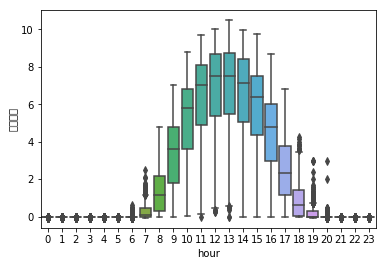

In [41]:
sns.boxplot(x='hour', y='实际功率', data=t1)

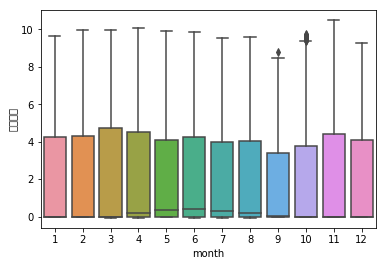

In [42]:
sns.boxplot(x='month', y='实际功率', data=t1)

In [37]:
t1[t1["实际功率"]>0.03*10]['时间'].dt.hour.value_counts().sort_index()

6       21
7      953
8     2113
9     2738
10    2778
11    2777
12    2780
13    2782
14    2780
15    2777
16    2760
17    2594
18    1689
19     637
20      20
Name: 时间, dtype: int64

In [36]:
t1[t1["实际功率"]>0.03*10]['时间'].dt.month.value_counts().sort_index()

1     2278
2     2215
3     2631
4     4196
5     3019
6     3000
7     2992
8     2850
9     1310
10    1841
11    1969
12    1898
Name: 时间, dtype: int64

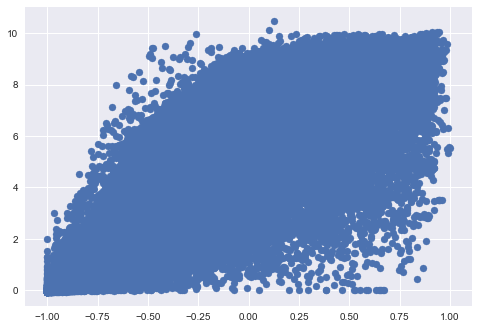

In [39]:
plt.scatter(t1["辐照度"], t1["实际功率"])

In [41]:
t1.columns

Index(['时间', '辐照度', '风速', '风向', '温度', '压强', '湿度', '实发辐照度', '实际功率'], dtype='object')

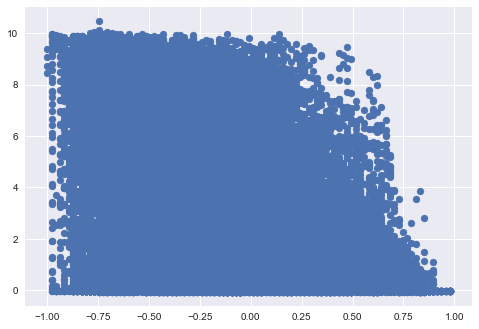

In [44]:
plt.scatter(t1["湿度"], t1["实际功率"])

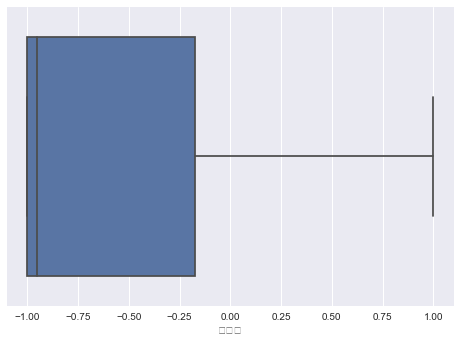

In [49]:
sns.boxplot(t1["辐照度"])

In [57]:
t1[(t1["辐照度"]>=0.90)].describe()

,辐照度,风速,风向,温度,压强,湿度,实发辐照度,实际功率
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.924179,-0.785169,137.004651,0.473432,-0.000423,-0.536059,997.809665,7.938972
std,0.022450,0.154076,67.466121,0.202334,0.222709,0.175407,129.354733,1.602055
min,0.900094,-1.000000,0.000000,-0.062626,-0.515152,-0.852632,578.489000,3.127000
25%,0.905749,-0.877358,106.500000,0.347475,-0.151515,-0.642105,898.667000,7.157830
50%,0.918944,-0.820755,117.000000,0.498990,-0.030303,-0.536842,1030.760000,8.548670
75%,0.937795,-0.707547,139.500000,0.606061,0.151515,-0.452632,1098.310000,9.059000
max,1.000000,0.443396,357.000000,0.838384,0.575758,-0.010526,1288.890000,10.047300


In [58]:
t1[(t1["辐照度"]>=0.90) & (t1["实际功率"]<=5.)]

,时间,辐照度,风速,风向,温度,压强,湿度,实发辐照度,实际功率
3316,2016-05-05 13:00:00,0.909519,-0.858491,118,0.486869,-0.151515,-0.621053,1078.040,4.68867
3317,2016-05-05 13:15:00,0.909519,-0.877358,117,0.503030,-0.151515,-0.642105,1083.380,4.65400
7254,2016-06-15 13:30:00,0.901979,-0.613208,357,0.410101,0.212121,-0.515789,1065.240,4.57533
7255,2016-06-15 13:45:00,0.907634,-0.575472,357,0.430303,0.212121,-0.557895,832.356,4.45800
7256,2016-06-15 14:00:00,0.915174,-0.537736,356,0.446465,0.151515,-0.600000,861.511,4.28267
7257,2016-06-15 14:15:00,0.907634,-0.500000,356,0.462626,0.151515,-0.621053,1165.160,4.93100
8885,2016-07-02 13:15:00,0.922714,-0.754717,106,0.672727,-0.212121,-0.515789,870.044,4.99333
8886,2016-07-02 13:30:00,0.900094,-0.735849,105,0.684848,-0.212121,-0.536842,909.155,4.98133
8980,2016-07-03 13:00:00,0.922714,-0.745283,146,0.729293,-0.272727,-0.536842,823.111,4.73933
8981,2016-07-03 13:15:00,0.922714,-0.754717,148,0.745455,-0.272727,-0.557895,864.000,4.76133


In [60]:
t1[(t1["辐照度"]==-1)].describe()

,辐照度,风速,风向,温度,压强,湿度,实发辐照度,实际功率
count,30486.0,30486.000000,30486.000000,30486.000000,30486.000000,30486.000000,30486.000000,30486.000000
mean,-1.0,-0.627024,165.758545,-0.145759,0.144525,0.063130,0.113435,-0.023117
std,0.0,0.259171,99.173082,0.347104,0.276948,0.431255,2.726974,0.026955
min,-1.0,-1.000000,0.000000,-1.000000,-0.878788,-0.978947,-0.020000,-0.073667
25%,-1.0,-0.820755,90.000000,-0.422222,-0.030303,-0.305263,0.000000,-0.022333
50%,-1.0,-0.679245,111.000000,-0.187879,0.151515,0.052632,0.000000,-0.022000
75%,-1.0,-0.490566,275.000000,0.139394,0.333333,0.431579,0.000000,-0.021000
max,-1.0,0.745283,359.000000,0.793939,0.939394,0.978947,158.222000,1.985330


In [62]:
t1[(t1["辐照度"]==-1) & (t1["实际功率"]>1.0)]

,时间,辐照度,风速,风向,温度,压强,湿度,实发辐照度,实际功率
20480,2016-10-31 08:00:00,-1.0,-0.726415,266,-0.426263,0.818182,-0.200000,158.222,1.51533
20768,2016-11-03 08:00:00,-1.0,-0.962264,284,-0.373737,0.757576,0.178947,136.178,1.28467
20864,2016-11-04 08:00:00,-1.0,-0.679245,249,-0.410101,0.393939,0.094737,142.933,1.28467
20960,2016-11-05 08:00:00,-1.0,-0.905660,174,-0.373737,0.151515,0.157895,122.311,1.14200
35611,2017-04-16 20:15:00,-1.0,-0.556604,295,-0.082828,0.454545,-0.368421,0.000,1.98533


In [65]:
t1[t1["时间"].dt.hour==12]["温度"].mean()

0.10853216068733351

In [67]:
t1.groupby(t1["时间"].dt.hour)["温度"].mean()

时间
0    -0.087518
1    -0.113318
2    -0.136514
3    -0.157648
4    -0.176682
5    -0.193161
6    -0.203001
7    -0.196455
8    -0.163745
9    -0.102991
10   -0.027463
11    0.046582
12    0.108532
13    0.157203
14    0.193906
15    0.217526
16    0.222646
17    0.203917
18    0.162108
19    0.108367
20    0.056041
21    0.012671
22   -0.022840
23   -0.053499
Name: 温度, dtype: float64

In [64]:
t1.iloc[20478:]

,时间,辐照度,风速,风向,温度,压强,湿度,实发辐照度,实际功率
20478,2016-10-31 07:30:00,-1.000000,-0.707547,266,-0.442424,0.818182,-0.157895,15.6443,0.083000
20479,2016-10-31 07:45:00,-1.000000,-0.716981,266,-0.434343,0.818182,-0.178947,85.6890,0.642333
20480,2016-10-31 08:00:00,-1.000000,-0.726415,266,-0.426263,0.818182,-0.200000,158.2220,1.515330
20481,2016-10-31 08:15:00,-0.950990,-0.745283,264,-0.414141,0.818182,-0.200000,233.9560,2.740330
20482,2016-10-31 08:30:00,-0.851084,-0.773585,261,-0.393939,0.818182,-0.221053,307.9110,3.655000
20483,2016-10-31 08:45:00,-0.751178,-0.801887,259,-0.373737,0.818182,-0.263158,383.2890,4.443000
20484,2016-10-31 09:00:00,-0.653157,-0.811321,255,-0.353535,0.818182,-0.284211,456.8890,5.177670
20485,2016-10-31 09:15:00,-0.553252,-0.839623,249,-0.329293,0.818182,-0.326316,524.0890,5.818670
20486,2016-10-31 09:30:00,-0.451461,-0.867925,240,-0.301010,0.818182,-0.347368,592.0000,6.398670
20487,2016-10-31 09:45:00,-0.347785,-0.896226,225,-0.268687,0.818182,-0.389474,655.6450,6.947330


In [69]:
t1['tmp_lag1'] = t1["温度"] - t1["温度"].shift(1)

In [71]:
t1[t1['tmp_lag1']>0.01]

,时间,辐照度,风速,风向,温度,压强,湿度,实发辐照度,实际功率,tmp_lag1
32,2016-04-01 08:00:00,-0.760603,-0.783019,203,-0.284848,0.090909,-0.010526,225.0670,1.787330,0.012121
33,2016-04-01 08:15:00,-0.672008,-0.783019,203,-0.268687,0.090909,-0.052632,290.1330,2.550000,0.016162
34,2016-04-01 08:30:00,-0.564562,-0.783019,203,-0.248485,0.090909,-0.094737,353.4220,3.317330,0.020202
35,2016-04-01 08:45:00,-0.455231,-0.792453,202,-0.224242,0.090909,-0.115789,419.5560,4.064000,0.024242
36,2016-04-01 09:00:00,-0.345900,-0.792453,202,-0.204040,0.090909,-0.157895,487.4670,4.751000,0.020202
37,2016-04-01 09:15:00,-0.245994,-0.792453,202,-0.179798,0.090909,-0.200000,552.5330,5.387670,0.024242
38,2016-04-01 09:30:00,-0.153629,-0.801887,199,-0.151515,0.090909,-0.242105,613.3330,5.939330,0.028283
39,2016-04-01 09:45:00,-0.059378,-0.801887,197,-0.127273,0.090909,-0.284211,675.5560,6.058000,0.024242
40,2016-04-01 10:00:00,0.034873,-0.811321,198,-0.098990,0.090909,-0.326316,733.5110,6.052330,0.028283
41,2016-04-01 10:15:00,0.125353,-0.811321,195,-0.070707,0.090909,-0.347368,791.1110,6.031330,0.028283


In [72]:
t1.corr()

,辐照度,风速,风向,温度,压强,湿度,实发辐照度,实际功率,tmp_lag1
辐照度,1.000000,-0.141624,-0.025764,0.400988,-0.105920,-0.407294,0.888918,0.898905,0.605857
风速,-0.141624,1.000000,0.232873,0.050438,-0.037914,-0.124268,-0.156140,-0.173593,-0.297579
风向,-0.025764,0.232873,1.000000,-0.332825,0.223064,-0.215145,0.000572,0.016323,0.079115
温度,0.400988,0.050438,-0.332825,1.000000,-0.325547,0.110024,0.262053,0.234638,0.015859
压强,-0.105920,-0.037914,0.223064,-0.325547,1.000000,0.180173,-0.052337,-0.028446,0.132853
湿度,-0.407294,-0.124268,-0.215145,0.110024,0.180173,1.000000,-0.436351,-0.419722,-0.119557
实发辐照度,0.888918,-0.156140,0.000572,0.262053,-0.052337,-0.436351,1.000000,0.961298,0.575067
实际功率,0.898905,-0.173593,0.016323,0.234638,-0.028446,-0.419722,0.961298,1.000000,0.637766
tmp_lag1,0.605857,-0.297579,0.079115,0.015859,0.132853,-0.119557,0.575067,0.637766,1.000000


In [74]:
t1.iloc[66800: 66830]

,时间,辐照度,风速,风向,温度,压强,湿度,实发辐照度,实际功率,tmp_lag1
66800,2018-04-30 09:15:00,-0.102733,-0.905660,114,-0.006061,0.272727,0.242105,245.902,2.56267,0.016162
66801,2018-04-30 09:30:00,-0.012253,-0.896226,112,0.010101,0.272727,0.221053,384.356,4.22433,0.016162
66802,2018-04-30 09:45:00,0.076343,-0.886792,110,0.026263,0.272727,0.221053,540.515,5.05600,0.016162
66803,2018-04-30 10:00:00,0.164939,-0.886792,114,0.038384,0.272727,0.221053,403.698,4.54633,0.012121
66804,2018-04-30 10:15:00,0.245994,-0.886792,114,0.054545,0.272727,0.200000,284.302,3.65833,0.016162
66805,2018-04-30 10:30:00,0.317625,-0.896226,112,0.074747,0.272727,0.157895,441.031,4.21500,0.020202
66806,2018-04-30 10:45:00,0.391140,-0.915094,117,0.090909,0.272727,0.136842,662.257,7.86733,0.016162
66807,2018-04-30 11:00:00,0.462771,-0.924528,120,0.107071,0.272727,0.115789,467.129,4.94233,0.016162
66808,2018-04-30 11:15:00,0.523091,-0.952830,112,0.123232,0.272727,0.073684,637.084,5.14000,0.016162
66809,2018-04-30 11:30:00,0.572102,-0.990566,135,0.143434,0.272727,0.031579,927.218,8.75733,0.020202
